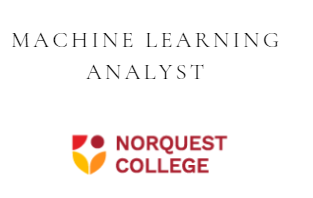

### Assignment: Machine Learning Model Training and Evaluation

**Objective:**  
In this assignment, you will use the **Machine Learning notebook** from last year's project as a starting point. Your goal is to retrain the model using the **2023 Food Drive data** for training and then use the **2024 Food Drive data** as the test set to evaluate the model’s accuracy and effectiveness. You will compare the predictions with the actual results from 2024 and assess the model's performance.

---

### Steps:

1. **Review the ML Notebook**
   - Start by reviewing the Machine Learning notebook provided from last year. Understand the model architecture, feature selection, and data preprocessing steps.
   - Ensure you understand the model’s objective and how predictions were generated for donation volumes, volunteer allocation, or other key metrics.

2. **Data Preparation**
   - **Load the 2023 data** as the training dataset and ensure that the data is cleaned and preprocessed in a way that matches last year's model requirements (feature scaling, missing value handling, etc.).
   - **Load the 2024 data** as the test dataset. Make sure that the test dataset is structured in the same format as the training data, ensuring consistency in features.

3. **Model Training**
   - Using the 2023 data, retrain the model provided in the notebook. Ensure that the parameters, features, and settings used in last year’s notebook are maintained unless you choose to optimize them.
   - Record the model's **training performance metrics**, such as accuracy, loss, or other relevant evaluation metrics based on your model (e.g., RMSE, MAE, precision).

4. **Model Testing**
   - Once the model is trained, use the 2024 data as the **test set**.
   - Generate predictions using the model and compare them to the actual results from the 2024 food drive.
   - Record the model’s **test performance metrics** and compare them to the training metrics.

5. **Accuracy and Performance Analysis**
   - Evaluate the **accuracy** of the model's predictions by comparing them to the actual outcomes from the 2024 data.
   - Use relevant evaluation metrics (e.g., accuracy, precision, recall, F1 score, MAE, RMSE, etc.) to measure the model's performance.
   - Identify **any discrepancies** between the predictions and actual outcomes. Are there any trends or patterns where the model performed well or poorly?





# Load data and run previous EDA

# Modelling

Predicting the **number of donation bags collected** is a regression problem, and there are several regression models you can use in addition to Linear Regression. Here are some commonly used regression models:

Ridge Regression and Lasso Regression: These are extensions of Linear Regression that add regularization to the model to prevent overfitting. Ridge regression uses L2 regularization, and Lasso regression uses L1 regularization.

Support Vector Regression (SVR): SVR is a regression technique that extends Support Vector Machines (SVM) to regression problems. It is particularly useful when dealing with non-linear relationships.

ElasticNet Regression: ElasticNet combines L1 and L2 regularization, offering a balance between Ridge and Lasso regression. It can handle cases where some features are irrelevant or redundant.

Polynomial Regression: Polynomial regression allows you to capture non-linear relationships by introducing polynomial features. It's suitable when the relationship between the input features and the target variable is curvilinear.

Random Forest Regression: Random Forest can also be used for regression tasks. It combines multiple decision trees to provide robust predictions.

Gradient Boosting Regressors: Algorithms like XGBoost, LightGBM, and CatBoost have regression variants. They are powerful and often provide state-of-the-art performance for regression tasks.

K-Nearest Neighbors (KNN) Regression: KNN can be adapted for regression by predicting the target variable as the average or weighted average of the K nearest neighbors' target values.

Neural Networks (Deep Learning): You can use deep learning models, such as feedforward neural networks, to perform regression tasks. Neural networks can capture complex relationships in the data.

Gaussian Process Regression: Gaussian process regression is a probabilistic approach that models the target variable as a distribution, providing uncertainty estimates along with predictions.

Decision Tree Regression: Decision trees can be used for regression as well as classification. They partition the data and predict the target variable as the average of the target values in each leaf node.

Bayesian Regression: Bayesian regression models incorporate Bayesian techniques to estimate model parameters and provide uncertainty estimates in predictions.

# Solution 1: Donation Prediction


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
!pip install joblib

In [ ]:
data_2023 = pd.read_csv('Food_Drive_2023.csv')
data_2024 = pd.read_csv('Food_Drive_2024.csv')

In [ ]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           450 non-null    object 
 1   Location                       450 non-null    object 
 2   Stake                          450 non-null    object 
 3   Ward/Branch                    450 non-null    object 
 4   # of Adult Volunteers          450 non-null    int64  
 5   # of Youth Volunteers          450 non-null    int64  
 6   Donation Bags Collected        450 non-null    int64  
 7   Time to Complete (min)         450 non-null    float64
 8   Completed More Than One Route  450 non-null    int64  
 9   Routes Completed               450 non-null    int64  
 10  Doors in Route                 450 non-null    int64  
 11  Time Spent                     450 non-null    float64
 12  Neighbourhood                  450 non-null    obj

In [ ]:
data_2023['Neighbourhood'].unique()

array(['CLAREVIEW', 'CRAWFORD PLAINS', 'SILVER BERRY', 'LONDONDERRY',
       'BLACKMUD CREEK', 'LEE RIDGE', 'SOUTHGATE', 'CONNORS HILL',
       'CORONATION PARK', 'FOREST HEIGHTS', 'GRIESBACH', 'GREENFIELD',
       'ELLERSLIE', 'RABBIT HILL', 'NAMAO', 'WAINWRIGHT BRANCH',
       'STONY PLAIN', 'WILD ROSE', 'WOODBEND', 'TERWILLEGAR PARK',
       'RIO VISTA', 'RUTHERFORD', 'STRATHCONA MARRIED STUDENT',
       'WINDSOR PARK YSA', 'BEAUMONT', 'DRAYTON VALLEY', 'ONOWAY',
       'LAGO LINDO BRANCH'], dtype=object)

In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ï»¿ID                                              446 non-null    int64  
 1   Start time                                         446 non-null    object 
 2   Completion time                                    446 non-null    object 
 3   Location                                           446 non-null    object 
 4   Ward/Branch                                        446 non-null    object 
 5   Stake                                              446 non-null    object 
 6   Route                                              446 non-null    object 
 7   Time Spent Collecting Donations                    446 non-null    object 
 8   # of Adult Volunteers                              446 non-null    int64  
 9   # of Youth

In [ ]:
data_2024 = data_2024.rename(columns={'Time Spent Collecting Donations': 'Time Spent', 'ï»¿ID': 'ID'})

In [ ]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 446 non-null    int64  
 1   Start time                                         446 non-null    object 
 2   Completion time                                    446 non-null    object 
 3   Location                                           446 non-null    object 
 4   Ward/Branch                                        446 non-null    object 
 5   Stake                                              446 non-null    object 
 6   Route                                              446 non-null    object 
 7   Time Spent                                         446 non-null    object 
 8   # of Adult Volunteers                              446 non-null    int64  
 9   # of Youth

In [ ]:
data_2024['Neighbourhood'].unique()

array(['CLAREVIEW', 'LEE RIDGE', 'FOREST HEIGHTS', 'SILVER BERRY',
       'CRAWFORD PLAINS', 'LONDONDERRY', 'WOODBEND', 'BLACKMUD CREEK',
       'CONNORS HILL', 'GRIESBACH', 'MILL CREEK YSA',
       'WHITEMUD CREEK YSA', 'RUTHERFORD', 'RABBIT HILL', 'NAMAO',
       'ELLERSLIE', 'GREENFIELD', 'SOUTHGATE', 'TERWILLEGAR PARK',
       'DEVON', 'WILD ROSE', 'RIO VISTA', 'BEAUMONT', 'WAINWRIGHT BRANCH'],
      dtype=object)

In [ ]:
# Group by 'Neighbourhood' and calculate total donations and average assessed value
df_grouped_2023 = data_2023.groupby(['Neighbourhood', 'New Route Number/Name']).agg({
    'Assessed Value': 'mean',
    '# of Adult Volunteers': 'mean',
    '# of Youth Volunteers': 'mean',
    'Routes Completed': 'mean',
    'Doors in Route': 'mean',
    'Time Spent': 'mean',
    'Donation Bags Collected': 'sum',
    'Ward/Branch': 'first',  # Taking the first value for 'Ward/Branch'
    'Stake': 'first'  # Taking the first value for 'Stake'
}).reset_index()

In [ ]:
df_grouped_2023.head()

,Neighbourhood,New Route Number/Name,Assessed Value,# of Adult Volunteers,# of Youth Volunteers,Routes Completed,Doors in Route,Time Spent,Donation Bags Collected,Ward/Branch,Stake
0,BEAUMONT,Gateway Stake 116,6706200.535,2.0,2.0,2.0,200.0,610.0,20,Beaumont Ward,Gateway Stake
1,BLACKMUD CREEK,Gateway Stake 105,503500.000,3.0,3.0,2.0,206.0,50.0,37,Blackmud Creek Ward,Gateway Stake
2,BLACKMUD CREEK,Gateway Stake 119,503500.000,2.0,4.0,2.0,154.0,45.0,18,Blackmud Creek Ward,Gateway Stake
3,BLACKMUD CREEK,Gateway Stake 123,503500.000,2.0,3.0,2.0,240.0,45.0,50,Blackmud Creek Ward,Gateway Stake
4,BLACKMUD CREEK,Gateway Stake 145,503500.000,3.0,0.0,2.0,171.0,45.0,30,Blackmud Creek Ward,Gateway Stake


In [ ]:
data_2024.drop(columns=['Time Spent'], inplace=True)

In [ ]:
data_2024 = data_2024.rename(columns={'Minutes Spent Collecting Donations': 'Time Spent'})


In [ ]:
data_2024.head()

,ID,Start time,Completion time,Location,Ward/Branch,Stake,Route,# of Adult Volunteers,# of Youth Volunteers,Doors in Route,...,Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Neighbourhood,Ward,Assessed Value,Time Spent,New Route Number/Name
0,25,2024-09-28 10:01,2024-09-28 10:05,Londonberry Chapel,Clareview Ward,Bonnie Doon Stake,Unassigned,1,0,1,...,NaN,NaN,NaN,NaN,NaN,CLAREVIEW,NaN,837500.0,30,Bonnie Doon Stake 1
1,26,2024-09-28 10:31,2024-09-28 10:34,Gateway Stake Centre,Lee Ridge Ward,Gateway Stake,50,2,2,20,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,Karhiio Ward,28618500.0,30,Gateway Stake 2
2,27,2024-09-28 10:33,2024-09-28 10:36,Bonnie Doon Stake Centre,Forest Heights Ward,Bonnie Doon Stake,98,2,2,20,...,NaN,NaN,NaN,NaN,NaN,FOREST HEIGHTS,MÃ©tis Ward,837500.0,30,Bonnie Doon Stake 2
3,28,2024-09-28 10:41,2024-09-28 10:43,Bearspaw Chapel,Lee Ridge Ward,Gateway Stake,6,2,3,144,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,Karhiio Ward,28618500.0,60,Gateway Stake 3
4,29,2024-09-28 10:36,2024-09-28 10:45,Gateway Stake Centre,Silver Berry Ward,Gateway Stake,19,1,0,230,...,NaN,NaN,NaN,NaN,NaN,SILVER BERRY,Sspomitapi Ward,162000.0,60,Gateway Stake 4


In [ ]:
df_grouped_2024 = data_2024.groupby(['Neighbourhood', 'New Route Number/Name']).agg({
    'Assessed Value': 'mean',
    '# of Adult Volunteers': 'mean',
    '# of Youth Volunteers': 'mean',
    'Routes Completed': 'mean',
    'Doors in Route': 'mean',
    'Time Spent': 'mean',
    'Donation Bags Collected': 'sum',
    'Ward/Branch': 'first',  # Taking the first value for 'Ward/Branch'
    'Stake': 'first'  # Taking the first value for 'Stake'
}).reset_index()

In [ ]:
# download the csv file
df_grouped_2024.to_csv('data_2024.csv', index=False)

In [ ]:
# Prepare Model 1 (without 'Assessed Value')
# Define feature (X1) and target (y1) for model 1, excluding 'Assessed Value'

X1_train = df_grouped_2023[['Neighbourhood','New Route Number/Name',
        '# of Adult Volunteers',
        '# of Youth Volunteers',
        'Routes Completed',
        'Doors in Route',
        'Time Spent',
        'Ward/Branch',
        'Stake']]
y1_train = df_grouped_2023['Donation Bags Collected']

In [ ]:
X1_test = df_grouped_2024[['Neighbourhood','New Route Number/Name',
        '# of Adult Volunteers',
        '# of Youth Volunteers',
        'Routes Completed',
        'Doors in Route',
        'Time Spent',
        'Ward/Branch',
        'Stake']]
y1_test = df_grouped_2024['Donation Bags Collected']

In [ ]:
# One-hot encode 'Neighbourhood' (fit on training data only)
encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X1_train_encoded = encoder1.fit_transform(X1_train) # Fit on trainning data
X1_test_encoded = encoder1.transform(X1_test)  # Transform test data using the same encoder

In [ ]:
model1 = LinearRegression()
model1.fit(X1_train_encoded, y1_train)

LinearRegression()

In [ ]:
# Prepare data for Model 2 (with property assessment)
# Training data from 2023
X2_train = df_grouped_2023[['Neighbourhood','New Route Number/Name',
        'Assessed Value',
        '# of Adult Volunteers',
        '# of Youth Volunteers',
        'Routes Completed',
        'Doors in Route',
        'Time Spent',
        'Ward/Branch',
        'Stake']]
y2_train = df_grouped_2023['Donation Bags Collected']

# Testing data from 2024
X2_test = df_grouped_2024[['Neighbourhood','New Route Number/Name', 'Assessed Value',
        '# of Adult Volunteers',
        '# of Youth Volunteers',
        'Routes Completed',
        'Doors in Route',
        'Time Spent',
        'Ward/Branch',
        'Stake']]
y2_test = df_grouped_2024['Donation Bags Collected']

In [ ]:
# Use ColumnTransformer for Model 2 with 'Assessed Value'
# This transformer will apply 'passthrough' to 'Assessed Value' and one-hot encode 'Neighbourhood' (fit on training data only)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Assessed Value']),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Neighbourhood']),
    ])

X2_train_encoded = preprocessor.fit_transform(X2_train)
X2_test_encoded = preprocessor.transform(X2_test)  # Transform test data using the same preprocessor

In [ ]:
# Train Model 2 (with 'Assed Value')
model2 = LinearRegression()
model2.fit(X2_train_encoded, y2_train)

LinearRegression()

In [ ]:
# Evaluate and Compare Models
# Make predictions for both Models
y1_pred = model1.predict(X1_test_encoded)
y2_pred = model2.predict(X2_test_encoded)

In [ ]:
# Evaluate the model without assessed value
mse1 = mean_squared_error(y1_test, y1_pred)
print(f"Mean Squared Error: {mse1}")
r2_1 = r2_score(y1_test, y1_pred)  # Calculate R-squared
print(f"R-squared: {r2_1}")

Mean Squared Error: 1569.7635734898797
R-squared: -2.4120353478012113


In [ ]:
#Evaluate the model with assessed value
mse2 = mean_squared_error(y2_test, y2_pred)
print(f"Mean Squared Error: {mse2}")
r2_2 = r2_score(y2_test, y2_pred)  # Calculate R-squared
print(f"R-squared: {r2_2}")

Mean Squared Error: 484.16823229070303
R-squared: -0.05238721980635708


In [ ]:
# Calculate the correlation between 'Assessed Value' and 'Donation Bags Collected' for 2023 data
correlation = data_2023['Assessed Value'].corr(data_2023['Donation Bags Collected'])
print("\nCorrelation between Assessed Value and Donation Bags Collected (2023 data):", correlation)


Correlation between Assessed Value and Donation Bags Collected (2023 data): -0.06773315647900766


In [ ]:
# Calculate the correlation between 'Assessed Value' and 'Donation Bags Collected' for 2024 data
correlation2 = data_2024['Assessed Value'].corr(data_2024['Donation Bags Collected'])
print("\nCorrelation between Assessed Value and Donation Bags Collected (2024 data):", correlation2)


Correlation between Assessed Value and Donation Bags Collected (2024 data): -0.08055577959994707


# Compare with other Regressor Models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [ ]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest  Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression() # Assuming LinearRegression is imported elsewhere
}

In [ ]:
# Step 2: Initialize Results Dictionaries
results_with_assessed = {}
results_without_assessed = {}

# Step 3: Train and Evaluate Each Model for Both Configurations
for model_name, model in models.items():
    # Model with Assessed Value
    model.fit(X2_train_encoded, y2_train)
    y_pred_with_assessed = model.predict(X2_test_encoded)
    mse_with_assessed = mean_squared_error(y2_test, y_pred_with_assessed)
    r2_with_assessed = r2_score(y2_test, y_pred_with_assessed)
    results_with_assessed[model_name] = {"Mean Squared Error": mse_with_assessed, "R-Squared": r2_with_assessed}

    # Model without Assessed Value
    model.fit(X1_train_encoded, y1_train)
    y_pred_without_assessed = model.predict(X1_test_encoded)
    mse_without_assessed = mean_squared_error(y1_test, y_pred_without_assessed)
    r2_without_assessed = r2_score(y1_test, y_pred_without_assessed)
    results_without_assessed[model_name] = {"Mean Squared Error": mse_without_assessed, "R-Squared": r2_without_assessed}

# Step 4: Convert Results to DataFrames with only Mean Squared Error
df_with_assessed = pd.DataFrame(results_with_assessed).T[['Mean Squared Error']]
df_with_assessed.columns = ['MSE (With Assessed Value)']

df_without_assessed = pd.DataFrame(results_without_assessed).T[['Mean Squared Error']]
df_without_assessed.columns = ['MSE (Without Assessed Value)']

# Concatenate the tables side by side
df_comparison = pd.concat([df_with_assessed, df_without_assessed], axis=1)
print("Model Performance Comparison (Mean Squared Error Only):")
print(df_comparison)

Model Performance Comparison (Mean Squared Error Only):
                      MSE (With Assessed Value)  MSE (Without Assessed Value)
Decision Tree                        481.666801                   1436.887892
K-Nearest  Neighbors                 587.447892                    475.377040
Random Forest                        487.171625                   1055.249652
Gradient Boosting                    474.576015                   1258.353789
Linear Regression                    484.168232                   1569.763573


The best model for data with assessed value is Gradient Boosting and for the data without assessed value it is K nearest neighbours.

# Hyperparameter Tuning on Best model

Tuning on K neighbours model for the data without assessed value.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', list(X1_train.select_dtypes(include=['number']).columns)),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         X1_train.select_dtypes(include=['object']).columns.tolist())
    ])

# Pipeline with KNN Regressor
pipeline_1 = Pipeline([
    ('preprocessor', preprocessor_1),
    ('regressor', KNeighborsRegressor())  # Use KNN regressor
])

# Define hyperparameter grid for KNN
param_grid_1 = {
        'regressor__n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20, 25],  # Wider range
        'regressor__weights': ['uniform', 'distance'],
        'regressor__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
        'regressor__p': [1, 2, 3], # add p for minkowski
        'regressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

# Initialize GridSearchCV
grid_search_1 = GridSearchCV(
    estimator=pipeline_1,
    param_grid=param_grid_1,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_1.fit(X1_train, y1_train)

# Get the best model and parameters
best_model_1 = grid_search_1.best_estimator_
best_params_1 = grid_search_1.best_params_
model_predictions_1 = best_model_1.predict(X1_test)

# Calculate R-squared and Mean Squared Error
r2_1 = r2_score(y1_test, model_predictions_1)
mse_1 = mean_squared_error(y1_test, model_predictions_1)

print(f"Best Model: {best_model_1}")
print("Best Hyperparameters:", best_params_1)
print("R-squared:", r2_1)
print("Mean Squared Error:", mse_1)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['# of Adult Volunteers',
                                                   '# of Youth Volunteers',
                                                   'Routes Completed',
                                                   'Doors in Route',
                                                   'Time Spent']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Neighbourhood',
                                                   'New Route Number/Name',
                                                   'Ward/Branch', 'Stake'])])),
    

Tuning on Gradient Booster model for data with assessed value.

In [ ]:

preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', list(X2_train.select_dtypes(include=['number']).columns)),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         X2_train.select_dtypes(include=['object']).columns.tolist())
    ])

pipeline_2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define the hyperparameter grid
param_grid_2 = {
    'regressor__learning_rate': [0.001, 0.005, 0.01, 0.05],
    'regressor__n_estimators': [300, 400, 500, 700],
    'regressor__max_depth': [2, 3],
    'regressor__min_samples_split': [ 10,20],
    'regressor__min_samples_leaf': [1,2,4],
    'regressor__subsample': [0.8, 0.9, 1.0]
}

# Re-initialize GridSearchCV with the expanded grid
grid_search_2 = GridSearchCV(estimator=pipeline_2, param_grid=param_grid_2,
                             cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit and evaluate as before
grid_search_2.fit(X2_train, y2_train)

# Get the best model and parameters
best_model_2 = grid_search_2.best_estimator_
best_params_2 = grid_search_2.best_params_
model_predictions_2 = best_model_2.predict(X2_test)

# Calculate R-squared and Mean Squared Error
r2_2 = r2_score(y2_test, model_predictions_2)
mse_2 = mean_squared_error(y2_test, model_predictions_2)


print(f"Best Model: {best_model_2}")
print("Best Hyperparameters:", best_params_2)
print("R-squared:", r2_2)  # Print R-squared
print("Mean Squared Error:", mse_2)  # Print MSE

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Assessed Value']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Neighbourhood'])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           min_samples_leaf=2,
                                           min_samples_split=20,
                                           n_estimators=700, random_state=42,
                                           subsample=0.8))])
Best Hyperparameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3,

# Hyperparameter Tuning for all the models

Hyperparameter Tuning on data without assessed value.

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

pipeline_3 = Pipeline([
    ('regressor', DecisionTreeRegressor())  # Placeholder, will be replaced during GridSearch
])

# Define the parameter grid
param_grid_3 = [
    {
        'regressor': [DecisionTreeRegressor()],
        'regressor__max_depth': [3, 5, 7, 9, 11, 13, None],  # Wider range
        'regressor__min_samples_split': [2, 5, 10, 15],       # Added
        'regressor__min_samples_leaf': [1, 2, 4, 6]  # Hyperparameters for Decision Tree
    },
    {
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20, 25],
        'regressor__weights': ['uniform', 'distance'],
        'regressor__metric': ['euclidean', 'manhattan', 'minkowski']  # Hyperparameters for KNN
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50, 100, 150],  # Hyperparameters for Random Forest
        'regressor__max_depth': [3, 5, 7]
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [50, 100, 150],  # Hyperparameters for Gradient Boosting
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 4, 5]
    }
]

# Create GridSearchCV object
grid_search_3 = GridSearchCV(pipeline_3, param_grid_3, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the model
grid_search_3.fit(X1_train_encoded, y1_train)

# Get the best model and its parameters
best_model_3 = grid_search_3.best_estimator_
best_params_3 = grid_search_3.best_params_

print("Best Model:", best_model_3)
print("Best Parameters:", best_params_3)

# Evaluate the best model
y_pred_3 = best_model_3.predict(X1_test_encoded)
mse_3 = mean_squared_error(y1_test, y_pred_3)
r2_3 = r2_score(y1_test, y_pred_3)
print("Mean Squared Error:", mse_3)
print("R-squared:", r2_3)

Fitting 5 folds for each of 202 candidates, totalling 1010 fits
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=5; total time=   0.0s
[CV] END regressor=DecisionTreeRegre

The best model is Gradient Boosting.

# Hyperparameter Tuning on data with assessed value.

In [ ]:

pipeline_4 = Pipeline([
    ('regressor', GradientBoostingRegressor())  # Placeholder, will be replaced during GridSearch
])

# Define the parameter grid
param_grid_4 = [
    {
        'regressor': [DecisionTreeRegressor()],
         'regressor__max_depth': [3, 5, 7, 9, None],
         'regressor__min_samples_split': [2, 5, 10],
         'regressor__min_samples_leaf': [1, 2, 4]  # Hyperparameters for Decision Tree
    },
    {
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20, 25],
        'regressor__weights': ['uniform', 'distance'],
        'regressor__metric': ['euclidean', 'manhattan', 'minkowski']  # Hyperparameters for KNN
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50, 100, 150],  # Hyperparameters for Random Forest
        'regressor__max_depth': [3, 5, 7]
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [50, 100, 150],  # Hyperparameters for Gradient Boosting
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 4, 5]
    }
]

# Create GridSearchCV object
grid_search_4 = GridSearchCV(pipeline_4, param_grid_4, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the model
grid_search_4.fit(X2_train_encoded, y2_train)

# Get the best model and its parameters
best_model_4 = grid_search_4.best_estimator_
best_params_4 = grid_search_4.best_params_

print("Best Model:", best_model_4)
print("Best Parameters:", best_params_4)

# Evaluate the best model
y_pred_4 = best_model_4.predict(X2_test_encoded)
mse_4 = mean_squared_error(y2_test, y_pred_4)
print("Mean Squared Error:", mse_4)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor=DecisionTreeRegressor(), regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=5; total time=   0.0s
[CV] END regressor=DecisionTreeRegres

The best model is Gradient boosting

Upload complete

Upload reduiuced

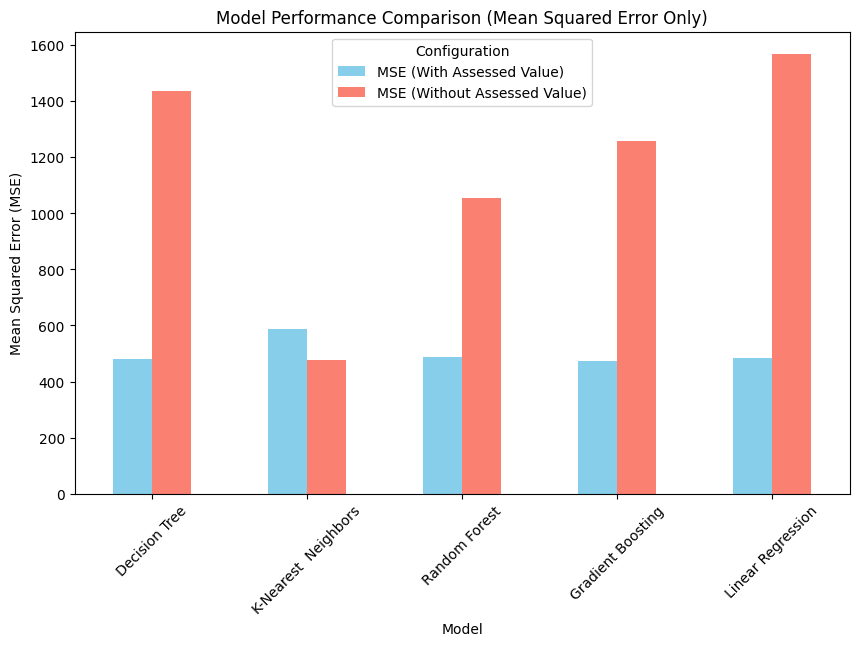

In [ ]:
import matplotlib.pyplot as plt

# Plot the MSE comparison
df_comparison.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Model Performance Comparison (Mean Squared Error Only)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.legend(title='Configuration')
plt.show()

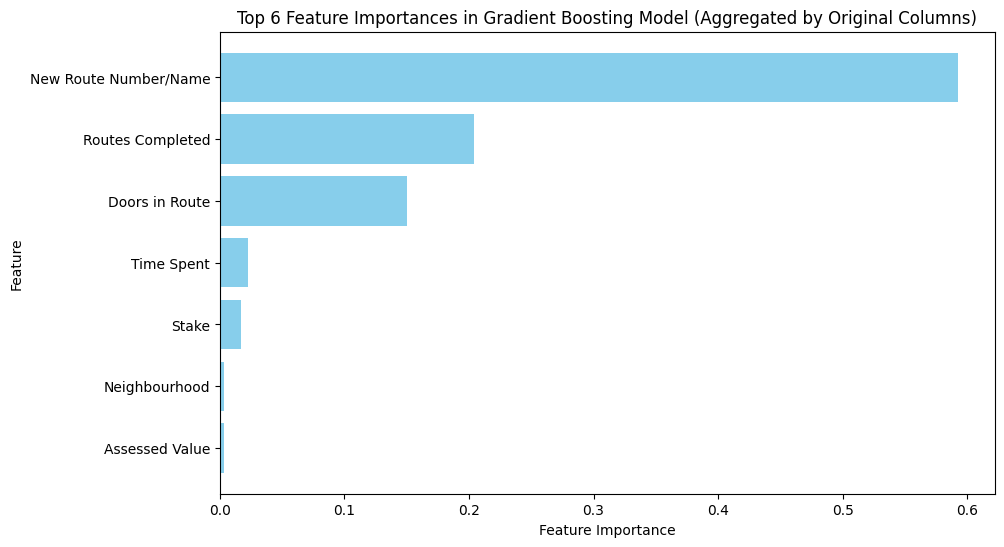

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df_grouped_2023` is your DataFrame and 'Donation Bags Collected' is your target variable
features = df_grouped_2023.drop(columns=['Donation Bags Collected'])
target = df_grouped_2023['Donation Bags Collected']

# Step 1: Define categorical and numerical columns
categorical_features = features.select_dtypes(include=['object']).columns
numerical_features = features.select_dtypes(exclude=['object']).columns

# Step 2: Preprocess features using OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ]
)

# Transform the features using the preprocessor
features_encoded = preprocessor.fit_transform(features)

# Step 3: Train the Gradient Boosting model
model = GradientBoostingRegressor()
model.fit(features_encoded, target)

# Step 4: Extract feature importances from the model
feature_importances = model.feature_importances_

# Get feature names after encoding
encoded_feature_names = numerical_features.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Step 5: Aggregate feature importances by main feature (column) name
# Initialize a dictionary to hold the aggregated importances
feature_importance_dict = {feature: 0 for feature in numerical_features.tolist() + categorical_features.tolist()}

# Loop over each encoded feature and add its importance to the original column
for feature_name, importance in zip(encoded_feature_names, feature_importances):
    for original_feature in feature_importance_dict.keys():
        if original_feature in feature_name:
            feature_importance_dict[original_feature] += importance
            break

# Convert the aggregated importances into a DataFrame
feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Plot the top features by aggregated importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:7], feature_importance_df['Importance'][:7], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 6 Feature Importances in Gradient Boosting Model (Aggregated by Original Columns)')
plt.gca().invert_yaxis()
plt.show()


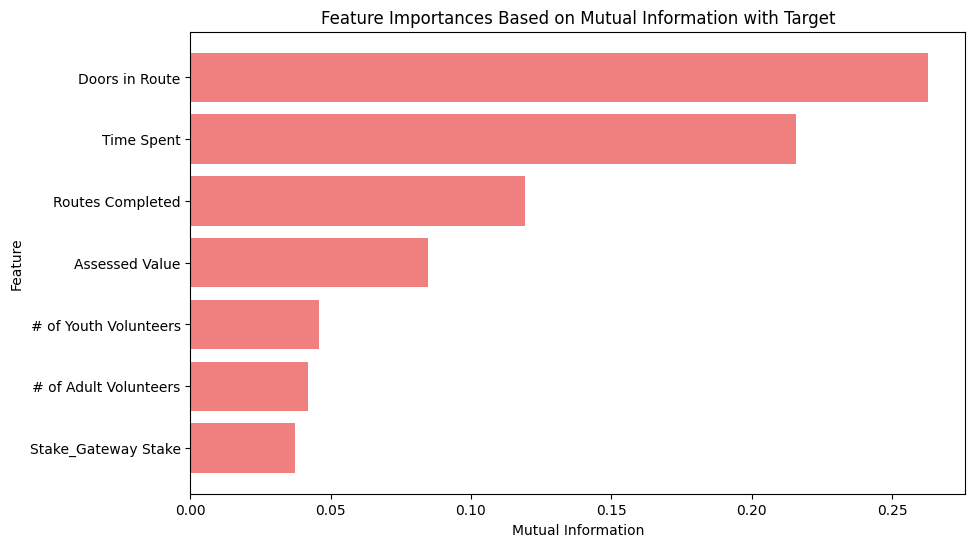

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df_grouped_2023` is your DataFrame and 'Donation Bags Collected' is your target variable
features = df_grouped_2023.drop(columns=['Donation Bags Collected'])
target = df_grouped_2023['Donation Bags Collected']

# Step 1: Use OneHotEncoder for categorical variables
categorical_features = features.select_dtypes(include=['object']).columns
numerical_features = features.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Step 2: Transform the features using the preprocessor
features_encoded = preprocessor.fit_transform(features)

# Step 3: Calculate mutual information
mutual_info = mutual_info_regression(features_encoded, target)

# Step 4: Get feature names after encoding
feature_names = numerical_features.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Create a DataFrame for mutual information scores
mutual_info_df = pd.DataFrame({
    'Feature': feature_names,
    'Mutual Information': mutual_info
})

# Sort by importance
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Step 5: Plot the top 10 features by mutual information
plt.figure(figsize=(10, 6))
plt.barh(mutual_info_df['Feature'][:7], mutual_info_df['Mutual Information'][:7], color='lightcoral')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title('Feature Importances Based on Mutual Information with Target')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Prepare data for Model 2 (with property assessment)
# Training data from 2023
#X5_train = df_grouped_2023[['Neighbourhood','New Route Number/Name',
#        'Routes Completed',
#        'Doors in Route',
#        'Time Spent',
#        'Stake']]
#y5_train = df_grouped_2023['Donation Bags Collected']

# Testing data from 2024
#X5_test = df_grouped_2024[['Neighbourhood','New Route Number/Name',
#       'Routes Completed',
#        'Doors in Route',
#        'Time Spent',
#        'Stake']]
#y5_test = df_grouped_2024['Donation Bags Collected']
# splitting data into train and test
#X5_train, X5_test, y5_train, y5_test = train_test_split(X5_train, y5_train, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Using OneHotEncoder
from sklearn.compose import ColumnTransformer

# Step 1: Extract the important features
important_features = ['New Route Number/Name', 'Routes Completed', 'Doors in Route', 'Time Spent', 'Stake', 'Neighbourhood']

# Create the new dataset with the important features
X_train_important = X2_train[important_features]
X_test_important = X2_test[important_features]

# Define categorical and numerical features
categorical_features = ['Neighbourhood', 'New Route Number/Name', 'Stake']
numerical_features = ['Routes Completed', 'Doors in Route', 'Time Spent']

# Step 2: Create a Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ]
)

# Step 3: Define the pipeline
pipeline_new_model = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('regressor', GradientBoostingRegressor(
        learning_rate=0.01, n_estimators=50, max_depth=3  # Use best parameters from GridSearch
    ))
])

# Step 4: Train the pipeline
pipeline_new_model.fit(X_train_important, y2_train)

# Step 5: Evaluate the pipeline
y_pred_new = pipeline_new_model.predict(X_test_important)
mse_new = mean_squared_error(y2_test, y_pred_new)

print("New Model Mean Squared Error:", mse_new)


New Model Mean Squared Error: 506.6728804719906


In [ ]:
# Downloading the model
import joblib
joblib.dump(pipeline_new_model, 'model.pkl')

['model.pkl']

In [ ]:
comparison_df = pd.DataFrame({'Actual': y1_test, 'Predicted': model_predictions_1})
print(comparison_df)

     Actual  Predicted
0         7  31.818182
1       100  37.181818
2        35  34.818182
3        71  56.181818
4        25  24.818182
..      ...        ...
441     118  75.363636
442       6  16.090909
443      47  33.545455
444      50  43.000000
445      35  32.181818

[446 rows x 2 columns]


In [ ]:
comparison_df_2 = pd.DataFrame({'Actual': y2_test, 'Predicted': model_predictions_2})
print(comparison_df_2)


     Actual  Predicted
0         7  28.696220
1       100  27.928238
2        35  27.928238
3        71  27.928238
4        25  27.928238
..      ...        ...
441     118  38.567513
442       6  38.567513
443      47  38.567513
444      50  38.567513
445      35  38.567513

[446 rows x 2 columns]


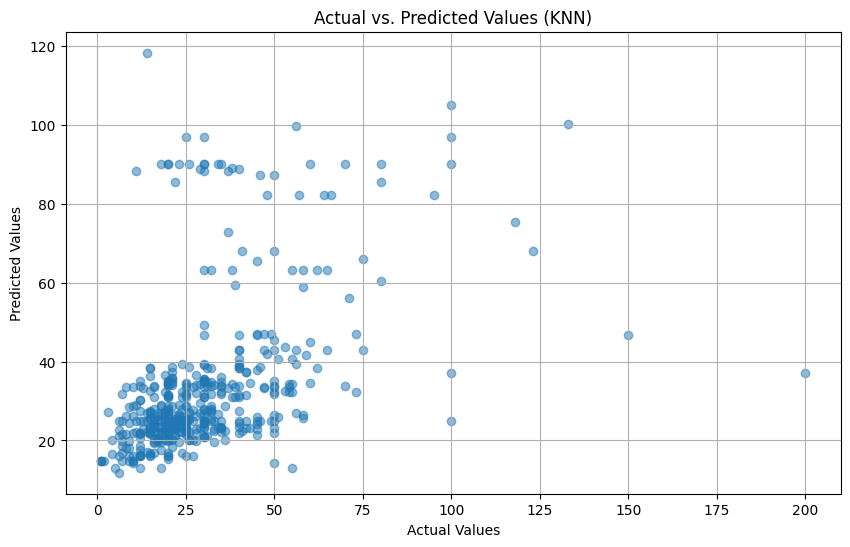

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, model_predictions_1, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (KNN)')
plt.grid(True)
plt.show()

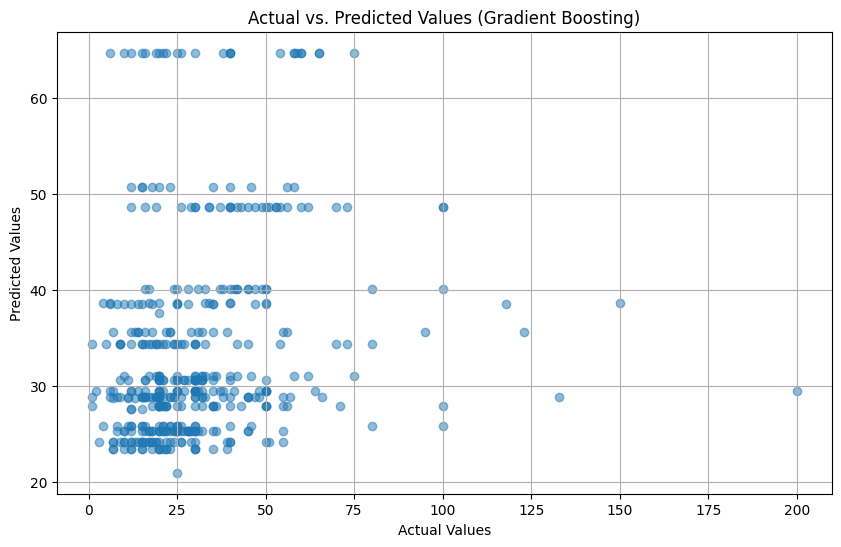

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, model_predictions_2, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Gradient Boosting)')
plt.grid(True)
plt.show()